<a href="https://colab.research.google.com/github/MESIBUN/Heart-Failure-Prediction-using-SVM/blob/main/Heart_Failure_prediction%20using%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure Clinical Records Dataset**

## The dataset is typically used for predicting the occurrence of death events in patients with heart failure. The goal is to identify key factors that contribute to mortality and use them to build predictive models.
## Rows: 299 (indicating the number of patient records)
## Columns: 13 (indicating various clinical features and one target variable)


# **Feature Description:**

## **age:** Age of the patient (in years).
## **anaemia:** Whether the patient has anemia (1 = yes, 0 = no).
## **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L).
## **diabetes:** Whether the patient has diabetes (1 = yes, 0 = no).
# **ejection_fraction:** Percentage of blood leaving the heart at each contraction (percentage).
## **high_blood_pressure:** Whether the patient has high blood pressure (1 = yes, 0 = no).
## **platelets:** Platelets in the blood (kiloplatelets/mL).
## **serum_creatinine:** Level of serum creatinine in the blood (mg/dL).
## **serum_sodium:** Level of serum sodium in the blood (mEq/L).
## **sex:** Gender of the patient (1 = male, 0 = female).
## **smoking:** Whether the patient is a smoker (1 = yes, 0 = no).
## **time:**  the time period when the event (death) was observed.
## **DEATH_EVENT:** Target variable whether the patient died during the follow-up period (1 = yes, 0 = no).

# **Key Points:**

## **Target Variable:**

 ## The target variable is DEATH_EVENT, which indicates whether the patient experienced a fatal event during the follow-up period. This is a binary classification problem where 1 signifies death and 0 signifies survival.##

## **Health Indicators:**

## The dataset includes various clinical indicators like serum creatinine, serum sodium, and ejection fraction, which are crucial in assessing the condition of heart failure patients.

## **Categorical Variables:**

## Binary indicators like anemia, diabetes, high blood pressure, and smoking are categorical features that provide insights into the patients' conditions.

## **Continuous Variables:**

 ## Variables like age, platelets, and creatinine phosphokinase levels are continuous features that need proper scaling before modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [3]:
# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
# EDA (Exploratory Data Analysis)
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5

In [7]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
print("\nChecking for missing values:")
df.isnull().sum()


Checking for missing values:


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [11]:
print("\nColumns in the Dataset:")
df.columns


Columns in the Dataset:


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
print("\nStructure of the Dataset:")
df.shape


Structure of the Dataset:


(299, 13)

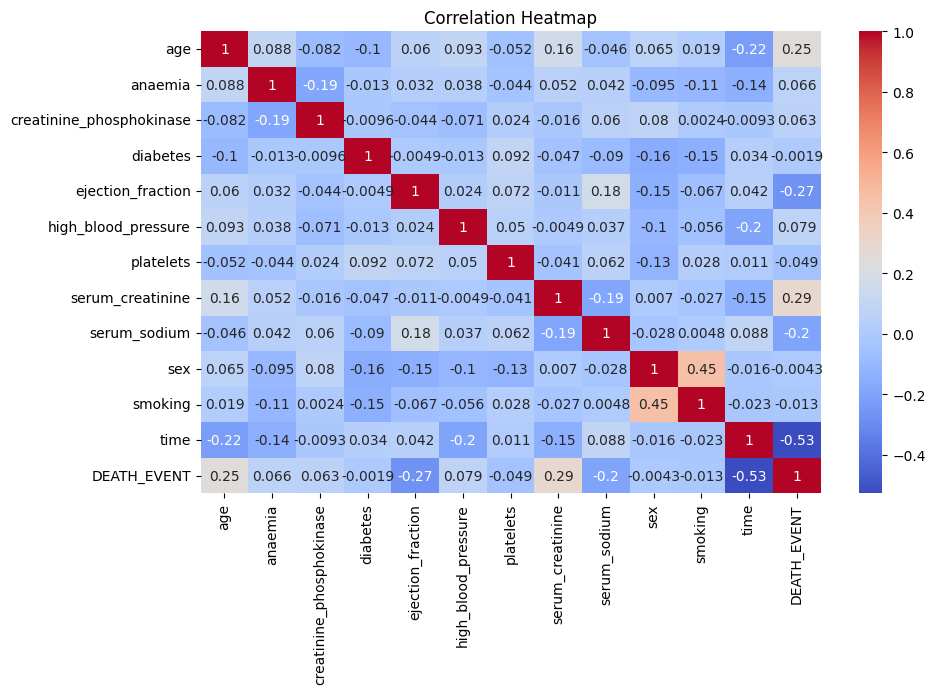

In [13]:
# Visualizations
# 1. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

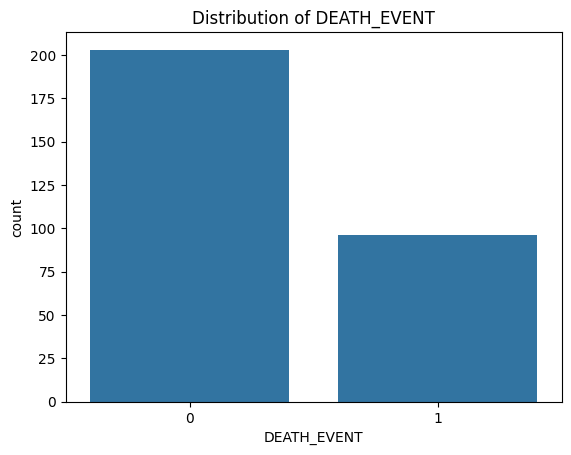

In [14]:
# 2. Distribution of the target variable
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT')
plt.show()

In [16]:
# Feature Selection
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [17]:
# Select the top 5 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

In [20]:
# Get selected feature names
mask = selector.get_support()  # boolean mask for selected features
selected_features = X.columns[mask]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], dtype='object')


In [33]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [34]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Model building and training
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [36]:
# Model evaluation
y_pred = model.predict(X_test)
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation Metrics:
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [37]:
# Predicting unknown values (using the testing set)
predictions = model.predict(X_test)
print("\nPredicted values for the test set:")
print(predictions)


Predicted values for the test set:
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1]


In [38]:
X_new_data = np.array([[60, 35, 1.2, 136, 100],  # Sample 1
                       [45, 50, 1.0, 140, 85]])  # Sample 2

# Ensure the new data is scaled using the same scaler used for training
X_new_data_scaled = scaler.transform(X_new_data)

# Predict the unknown values
predictions = model.predict(X_new_data_scaled)

# Display predictions
print("Predicted DEATH_EVENT for unknown data:")
print(predictions)

Predicted DEATH_EVENT for unknown data:
[0 0]
